# **Mining Inventory**

In [60]:
import pandas as pd
import numpy as np


In [62]:
file_path = r"C:\Users\Reedemer Kanton\Downloads\mining_inventory_data.xlsx"
df = pd.read_excel(file_path)


In [63]:
df.head()  # Shows the first 5 rows
df.info()  # Provides an overview of the dataset
df.describe()  # Shows basic statistics


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           100 non-null    datetime64[ns]
 1   Product Name   100 non-null    object        
 2   Stock In       100 non-null    int64         
 3   Stock Out      100 non-null    int64         
 4   Current Stock  100 non-null    int64         
 5   Supplier       100 non-null    object        
 6   Category       100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB


,Date,Stock In,Stock Out,Current Stock
count,100,100.000000,100.000000,100.00000
mean,2024-09-05 07:40:48,108.170000,58.130000,50.04000
min,2024-03-10 00:00:00,12.000000,5.000000,0.00000
25%,2024-06-24 00:00:00,62.750000,22.750000,13.00000
50%,2024-08-27 00:00:00,110.000000,48.000000,43.50000
75%,2024-12-03 00:00:00,150.000000,81.000000,69.25000
max,2025-02-27 00:00:00,196.000000,187.000000,178.00000
std,NaN,53.411695,43.416623,42.40424


In [66]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           100 non-null    datetime64[ns]
 1   Product Name   100 non-null    object        
 2   Stock In       100 non-null    int64         
 3   Stock Out      100 non-null    int64         
 4   Current Stock  100 non-null    int64         
 5   Supplier       100 non-null    object        
 6   Category       100 non-null    object        
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB


In [68]:
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
print(df)


         Date      Product Name  Stock In  Stock Out  Current Stock  \
0  2024-08-01            Gloves       142         22            120   
1  2024-10-02    Conveyor Belts        16         13              3   
2  2024-10-15    Conveyor Belts        20          9             11   
3  2025-01-20            Gloves       184         71            113   
4  2025-01-20            Diesel       188         29            159   
5  2024-03-29           Cyanide        48         38             10   
6  2024-03-21     Hydraulic Oil        49         26             23   
7  2024-10-01        Drill Bits       100         24             76   
8  2024-03-14           Cyanide        47         41              6   
9  2024-10-11    Conveyor Belts        57         33             24   
10 2024-06-07            Diesel       100         33             67   
11 2024-12-17        Detonators       127         59             68   
12 2024-10-03           Helmets        84         11             73   
13 202

In [70]:
df.index = df.index + 1


In [72]:
print(df)

          Date      Product Name  Stock In  Stock Out  Current Stock  \
1   2024-08-01            Gloves       142         22            120   
2   2024-10-02    Conveyor Belts        16         13              3   
3   2024-10-15    Conveyor Belts        20          9             11   
4   2025-01-20            Gloves       184         71            113   
5   2025-01-20            Diesel       188         29            159   
6   2024-03-29           Cyanide        48         38             10   
7   2024-03-21     Hydraulic Oil        49         26             23   
8   2024-10-01        Drill Bits       100         24             76   
9   2024-03-14           Cyanide        47         41              6   
10  2024-10-11    Conveyor Belts        57         33             24   
11  2024-06-07            Diesel       100         33             67   
12  2024-12-17        Detonators       127         59             68   
13  2024-10-03           Helmets        84         11           

In [74]:
print(df.isnull().sum())


Date             0
Product Name     0
Stock In         0
Stock Out        0
Current Stock    0
Supplier         0
Category         0
dtype: int64


In [76]:
df

,Date,Product Name,Stock In,Stock Out,Current Stock,Supplier,Category
1,2024-08-01,Gloves,142,22,120,Supplier A,Protective Gear
2,2024-10-02,Conveyor Belts,16,13,3,Supplier D,Equipment Parts
3,2024-10-15,Conveyor Belts,20,9,11,Supplier A,Equipment Parts
4,2025-01-20,Gloves,184,71,113,Supplier C,Protective Gear
5,2025-01-20,Diesel,188,29,159,Supplier B,Fuel & Lubricants
6,2024-03-29,Cyanide,48,38,10,Supplier B,Chemicals
7,2024-03-21,Hydraulic Oil,49,26,23,Supplier B,Fuel & Lubricants
8,2024-10-01,Drill Bits,100,24,76,Supplier D,Equipment Parts
9,2024-03-14,Cyanide,47,41,6,Supplier A,Chemicals
10,2024-10-11,Conveyor Belts,57,33,24,Supplier A,Equipment Parts


In [78]:
# Checking if there are duplicates before dropping them
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicates found.")



No duplicates found.


In [84]:
# Display the cleaned dataset
print("\nCleaned Data Sample:")
df


Cleaned Data Sample:


,Date,Product Name,Stock In,Stock Out,Current Stock,Supplier,Category
1,2024-08-01,Gloves,142,22,120,Supplier A,Protective Gear
2,2024-10-02,Conveyor Belts,16,13,3,Supplier D,Equipment Parts
3,2024-10-15,Conveyor Belts,20,9,11,Supplier A,Equipment Parts
4,2025-01-20,Gloves,184,71,113,Supplier C,Protective Gear
5,2025-01-20,Diesel,188,29,159,Supplier B,Fuel & Lubricants
6,2024-03-29,Cyanide,48,38,10,Supplier B,Chemicals
7,2024-03-21,Hydraulic Oil,49,26,23,Supplier B,Fuel & Lubricants
8,2024-10-01,Drill Bits,100,24,76,Supplier D,Equipment Parts
9,2024-03-14,Cyanide,47,41,6,Supplier A,Chemicals
10,2024-10-11,Conveyor Belts,57,33,24,Supplier A,Equipment Parts


In [82]:

df

,Date,Product Name,Stock In,Stock Out,Current Stock,Supplier,Category
1,2024-08-01,Gloves,142,22,120,Supplier A,Protective Gear
2,2024-10-02,Conveyor Belts,16,13,3,Supplier D,Equipment Parts
3,2024-10-15,Conveyor Belts,20,9,11,Supplier A,Equipment Parts
4,2025-01-20,Gloves,184,71,113,Supplier C,Protective Gear
5,2025-01-20,Diesel,188,29,159,Supplier B,Fuel & Lubricants
6,2024-03-29,Cyanide,48,38,10,Supplier B,Chemicals
7,2024-03-21,Hydraulic Oil,49,26,23,Supplier B,Fuel & Lubricants
8,2024-10-01,Drill Bits,100,24,76,Supplier D,Equipment Parts
9,2024-03-14,Cyanide,47,41,6,Supplier A,Chemicals
10,2024-10-11,Conveyor Belts,57,33,24,Supplier A,Equipment Parts


In [86]:
#General summary statistics

print(df.describe())


                      Date    Stock In   Stock Out  Current Stock
count                  100  100.000000  100.000000      100.00000
mean   2024-09-05 07:40:48  108.170000   58.130000       50.04000
min    2024-03-10 00:00:00   12.000000    5.000000        0.00000
25%    2024-06-24 00:00:00   62.750000   22.750000       13.00000
50%    2024-08-27 00:00:00  110.000000   48.000000       43.50000
75%    2024-12-03 00:00:00  150.000000   81.000000       69.25000
max    2025-02-27 00:00:00  196.000000  187.000000      178.00000
std                    NaN   53.411695   43.416623       42.40424


In [94]:
# Find top suppliers by total stock supplied
top_suppliers = df.groupby('Supplier')['Stock In'].sum().sort_values(ascending=False)
print(top_suppliers.head(10))  # Show top 10 suppliers


Supplier
Supplier A    3000
Supplier B    2858
Supplier C    2760
Supplier D    2199
Name: Stock In, dtype: int64


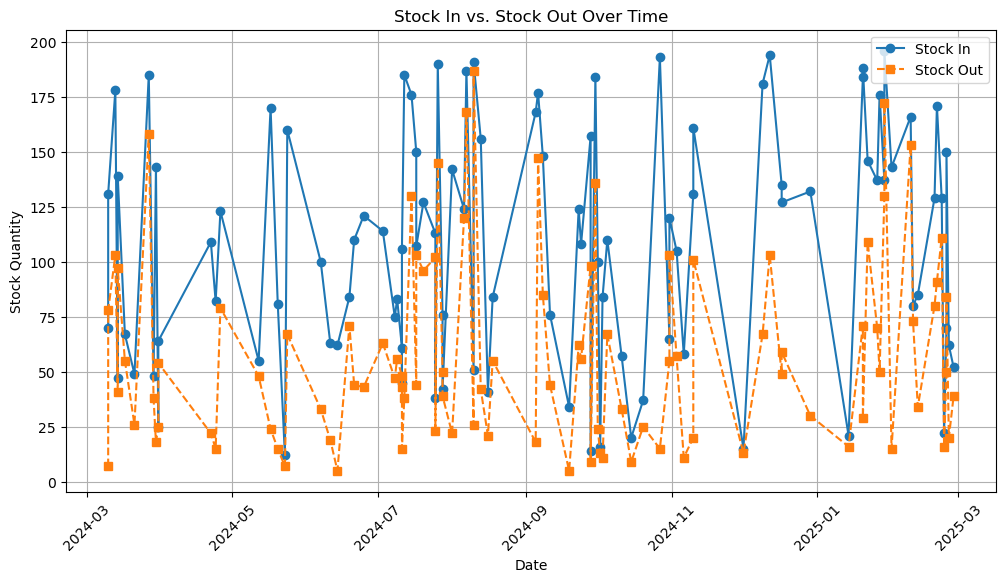

In [100]:
import matplotlib.pyplot as plt  

  
df['Date'] = pd.to_datetime(df['Date'])

  
df = df.sort_values('Date')

s  
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Stock In'], label='Stock In', marker='o', linestyle='-')
plt.plot(df['Date'], df['Stock Out'], label='Stock Out', marker='s', linestyle='--')

# Labels and title  
plt.xlabel('Date')
plt.ylabel('Stock Quantity')
plt.title('Stock In vs. Stock Out Over Time')
plt.legend()
plt.xticks(rotation=45)  
plt.grid(True)

 
plt.show()
